# Task 2

#### Action I

Reading through the data set im seeeing alot of information related to a customer whom is labeled as an ID. The data relating to this customer is pretty much their spending habbits? Looking at different payments, different balances, frequencys of both... Mostly looking to relate to a credit score. I would imagine this is what a bank would look at before giving out loans or cerdit cards etc. 

#### Action II

In [16]:
import kagglehub

path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", "ml-techniques-stocks-clusters-asignment\data\ccgen.csv")

# Attempted to get the dataset this way but it didnt work, 
# im keeping it here so I can give it a go after 
# the asignment is done

Path to dataset files: ml-techniques-stocks-clusters-asignment\data\ccgen.csv


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Import csv (Had to manually add seperators etc bc it wasnt importing correctly)
df = pd.read_csv("data\CC GENERAL.csv", sep=",", header=0)
print("Sample data:")
print(df.head())

# Ran into issues trying to drop the IDs
X = df.drop(columns=["CUST_ID"])
X_clean = X.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

Sample data:
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.

#### Action III

In [18]:
from sklearn.cluster import KMeans

inertia_list = []
for n_clusters in range(3, 16):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    print(f"n_clusters={n_clusters}, inertia={kmeans.inertia_}")

n_clusters=3, inertia=108086.4949560575
n_clusters=4, inertia=95661.10686235304
n_clusters=5, inertia=88614.60726596686
n_clusters=6, inertia=84003.80569529414
n_clusters=7, inertia=77313.10328751554
n_clusters=8, inertia=73475.61326772088
n_clusters=9, inertia=70309.91312671936
n_clusters=10, inertia=66026.35337638501
n_clusters=11, inertia=61174.333479023226
n_clusters=12, inertia=60922.23181720574
n_clusters=13, inertia=56816.05641676475
n_clusters=14, inertia=55296.884356744624
n_clusters=15, inertia=53655.09503310973


#### Action IV

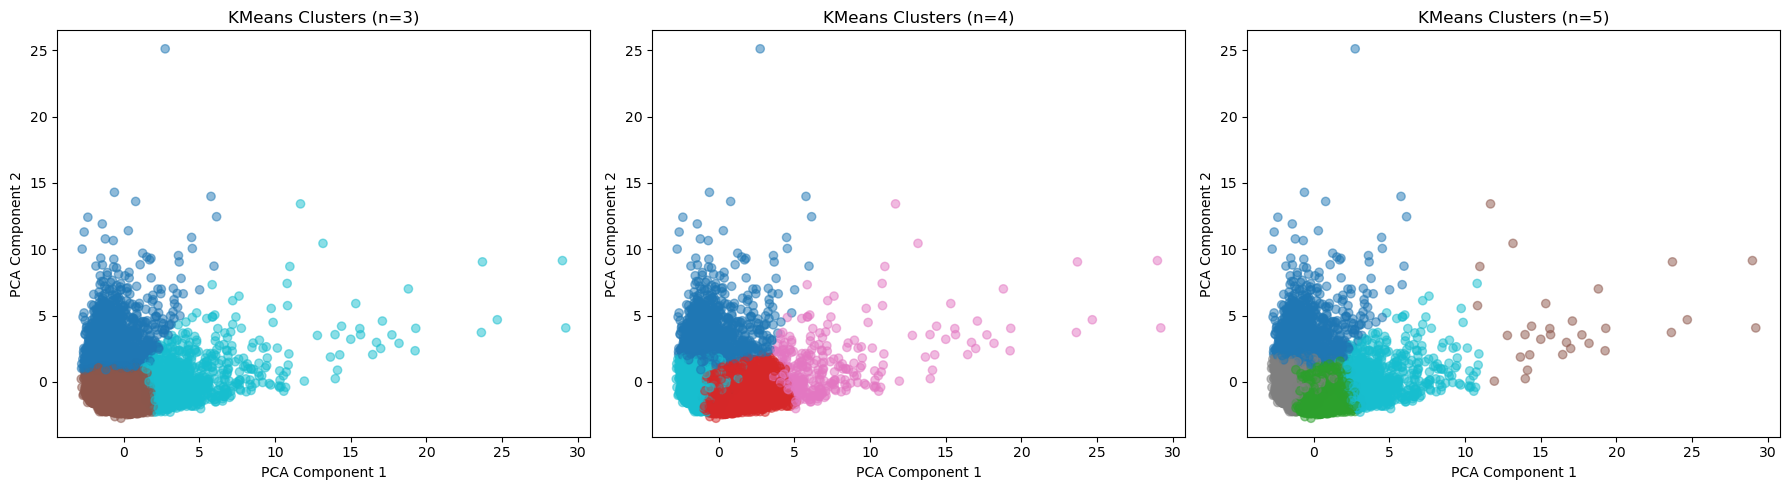

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, n_clusters in enumerate([3, 4, 5]):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    axes[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.5)
    axes[idx].set_title(f"KMeans Clusters (n={n_clusters})")
    axes[idx].set_xlabel("PCA Component 1")
    axes[idx].set_ylabel("PCA Component 2")
plt.tight_layout()
plt.show()